# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zaragoza
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | dombarovskiy
Processing Record 7 of Set 1 | magistral'nyy
Processing Record 8 of Set 1 | lensk
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | kattivakkam
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | tofol
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | wahpeton
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | rongelap
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | darwin
Proc

Processing Record 43 of Set 4 | remire-montjoly
Processing Record 44 of Set 4 | sittwe
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | dawesville
Processing Record 48 of Set 4 | aberdeen
Processing Record 49 of Set 4 | roma
Processing Record 0 of Set 5 | nuuk
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | utrik
Processing Record 3 of Set 5 | keflavik
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | freetown
Processing Record 6 of Set 5 | leava
Processing Record 7 of Set 5 | road town
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | hauterive
Processing Record 10 of Set 5 | chipinge
Processing Record 11 of Set 5 | smirnykh
Processing Record 12 of Set 5 | isafjordur
Processing Record 13 of Set 5 | moyynkum
Processing Record 14 of Set 5 | tshikapa
Processing Record 15 of Set 5 | awjilah
Processing Record 16 of Set 5 | port lincoln
Processing Record 17 of

Processing Record 36 of Set 8 | ola
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | cafayate
Processing Record 39 of Set 8 | semera
Processing Record 40 of Set 8 | punta del este
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | santa elena de uairen
Processing Record 43 of Set 8 | rio tinto
Processing Record 44 of Set 8 | cova figueira
Processing Record 45 of Set 8 | tampere
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | chernyshevskiy
Processing Record 48 of Set 8 | kailua-kona
Processing Record 49 of Set 8 | cole harbour
Processing Record 0 of Set 9 | cill airne
Processing Record 1 of Set 9 | roshal'
Processing Record 2 of Set 9 | buala
Processing Record 3 of Set 9 | leppavirta
Processing Record 4 of Set 9 | christchurch
Processing Record 5 of Set 9 | solvang
Processing Record 6 of Set 9 | nizhnesortymskiy
Processing Record 7 of Set 9 | fort abbas
Processing Record 8 of Set 9 | can gio
Processing Record 9

Processing Record 21 of Set 12 | porto torres
Processing Record 22 of Set 12 | savanna-la-mar
Processing Record 23 of Set 12 | sillamae
Processing Record 24 of Set 12 | padangsidempuan
Processing Record 25 of Set 12 | mossendjo
Processing Record 26 of Set 12 | rocha
Processing Record 27 of Set 12 | antsiranana
Processing Record 28 of Set 12 | novodvinsk
Processing Record 29 of Set 12 | al bayda
Processing Record 30 of Set 12 | caleta de carquin
Processing Record 31 of Set 12 | ta`u
Processing Record 32 of Set 12 | pirapemas
Processing Record 33 of Set 12 | san luis de la loma
Processing Record 34 of Set 12 | gutao
Processing Record 35 of Set 12 | divino das laranjeiras
Processing Record 36 of Set 12 | hakha
Processing Record 37 of Set 12 | tolanaro
Processing Record 38 of Set 12 | sterling
Processing Record 39 of Set 12 | floro
Processing Record 40 of Set 12 | bathsheba
Processing Record 41 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 12 | altamira
Pro

In [ ]:
print(city_data)

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zaragoza,41.6561,-0.8773,16.56,45,20,8.23,ES,1698686655
1,bethel,41.3712,-73.4140,13.20,91,100,0.00,US,1698686354
2,aasiaat,68.7098,-52.8699,-4.47,79,64,6.91,GL,1698686611
3,grytviken,-54.2811,-36.5092,5.74,75,91,4.98,GS,1698686567
4,edinburgh of the seven seas,-37.0676,-12.3116,11.68,86,95,14.65,SH,1698686568


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zaragoza,41.6561,-0.8773,16.56,45,20,8.23,ES,1698686655
1,bethel,41.3712,-73.4140,13.20,91,100,0.00,US,1698686354
2,aasiaat,68.7098,-52.8699,-4.47,79,64,6.91,GL,1698686611
3,grytviken,-54.2811,-36.5092,5.74,75,91,4.98,GS,1698686567
4,edinburgh of the seven seas,-37.0676,-12.3116,11.68,86,95,14.65,SH,1698686568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

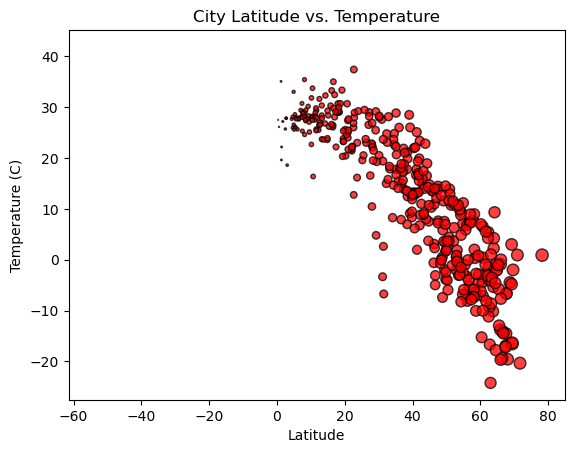

In [20]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Latitude vs. Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

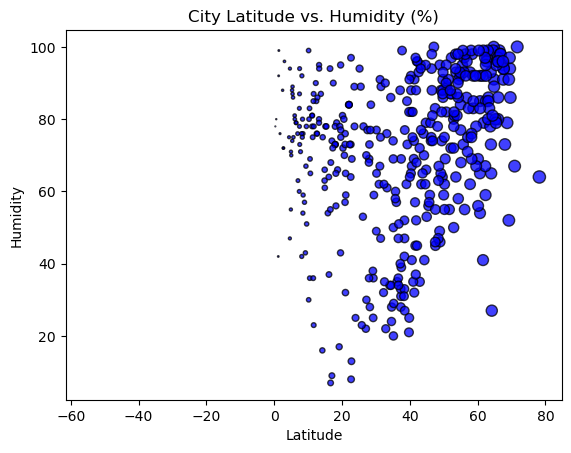

In [22]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

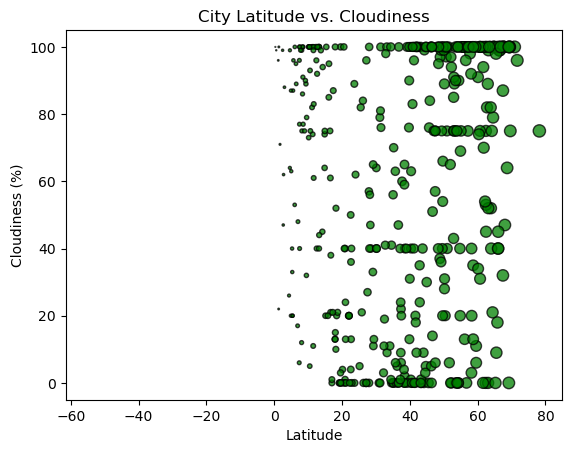

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

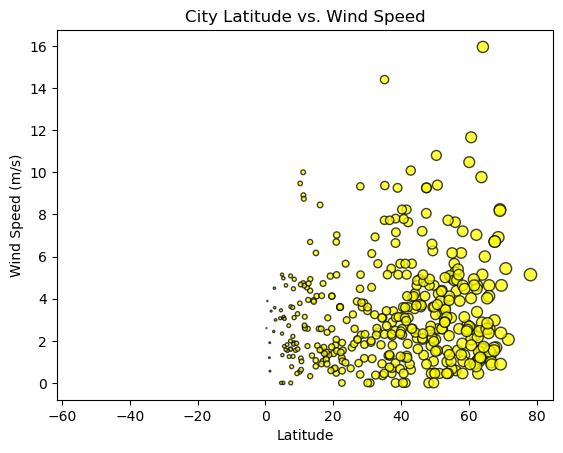

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots


In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zaragoza,41.6561,-0.8773,16.56,45,20,8.23,ES,1698686655
1,bethel,41.3712,-73.4140,13.20,91,100,0.00,US,1698686354
2,aasiaat,68.7098,-52.8699,-4.47,79,64,6.91,GL,1698686611
5,dombarovskiy,50.7587,59.5386,4.44,82,97,9.39,RU,1698686657
6,magistral'nyy,56.1725,107.4458,-8.13,55,13,0.59,RU,1698686657


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,5.74,75,91,4.98,GS,1698686567
4,edinburgh of the seven seas,-37.0676,-12.3116,11.68,86,95,14.65,SH,1698686568
10,port-aux-francais,-49.3500,70.2167,2.91,73,72,14.54,TF,1698686566
19,puerto natales,-51.7236,-72.4875,6.25,39,75,3.60,CL,1698686569
21,darwin,-12.4611,130.8418,26.99,80,100,1.03,AU,1698686271


###  Temperature vs. Latitude Linear Regression Plot

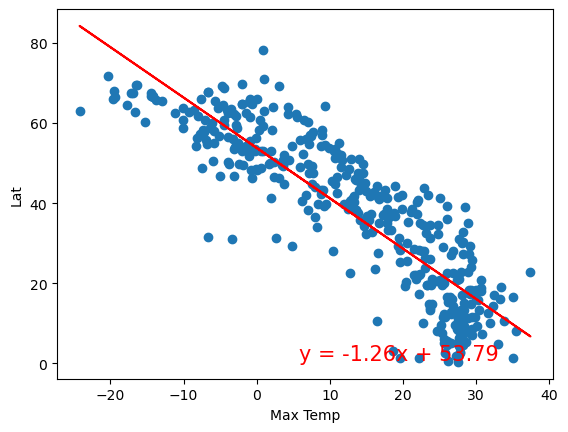

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

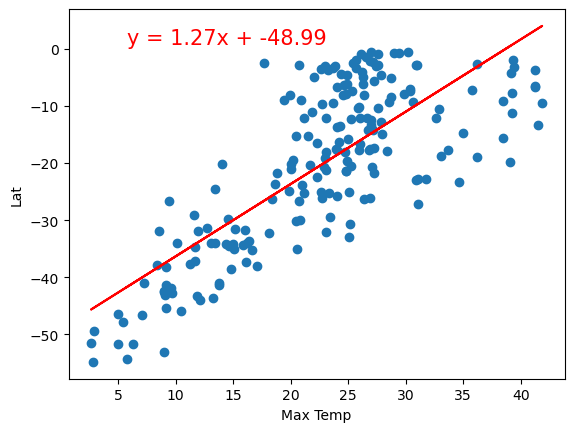

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** Max temperature increases the closer the city is to 0 degrees latitude. 

### Humidity vs. Latitude Linear Regression Plot

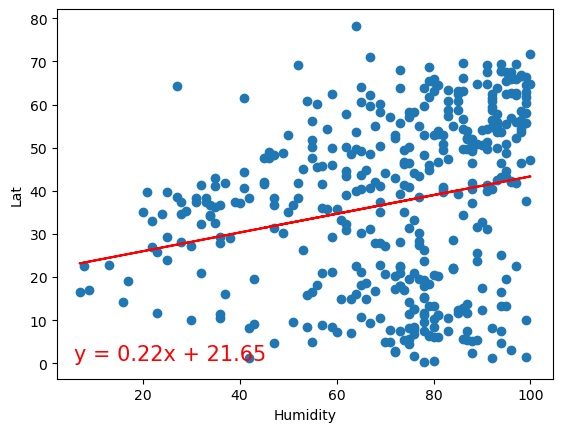

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()

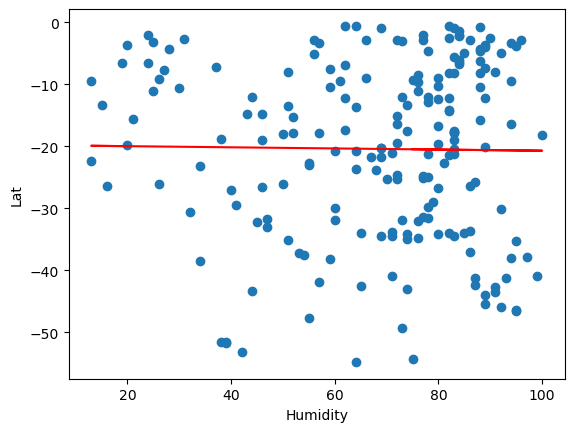

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** The humidity levels are spread out pretty evenly in the southern hemisphere. In the northern hemisphere the higher humidity locations are further north.

### Cloudiness vs. Latitude Linear Regression Plot

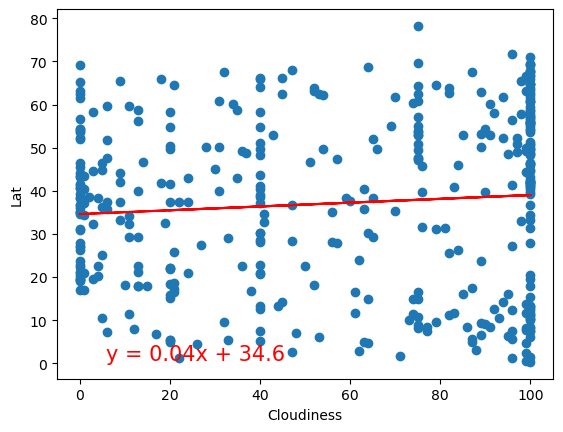

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()

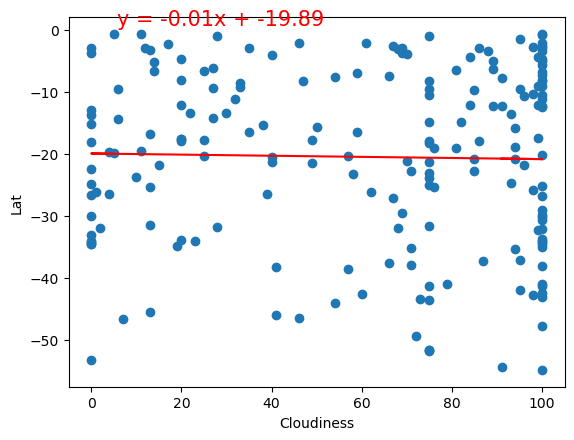

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** Cloudiness is pretty widespread in this data. There is not any real relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

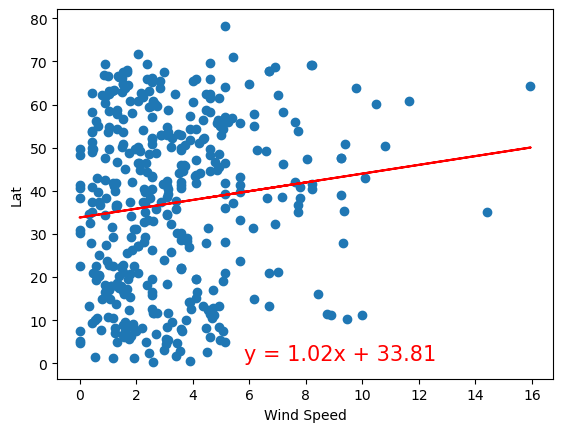

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()

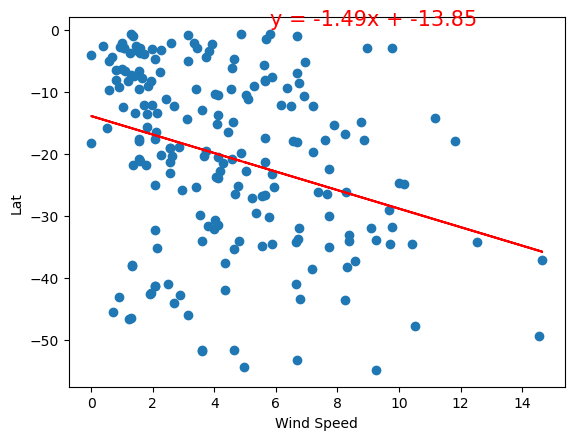

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** It is not very windy in the data we recieved today. There are a few outliers.